In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':120})

## 1. Import data

In [213]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [214]:
df = df.drop(columns= ['RowNumber','CustomerId','Surname'], axis=1)

## 2. EDA

<Axes: >

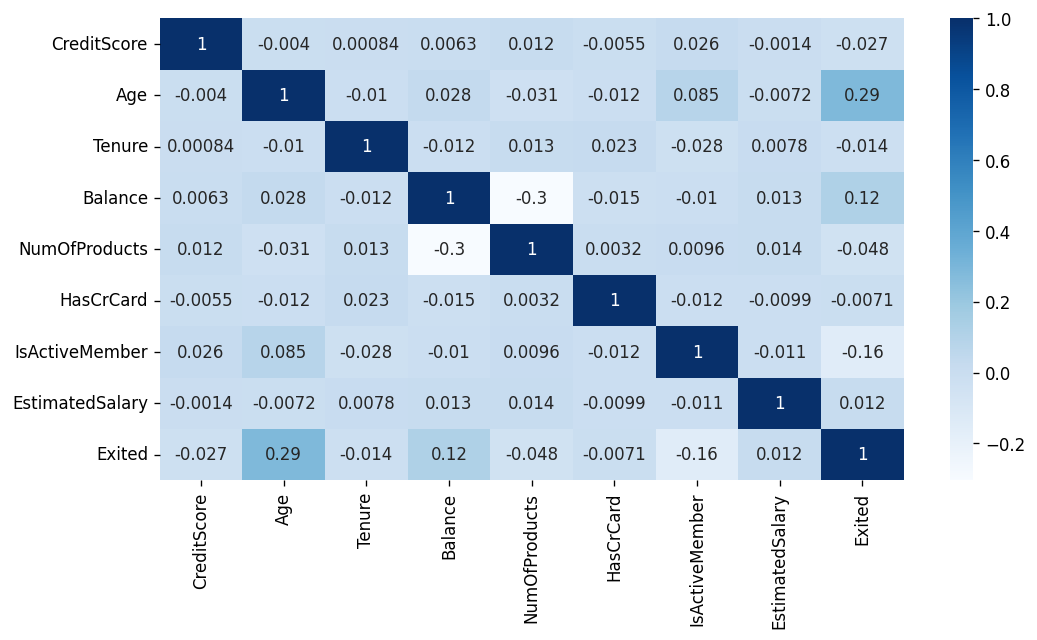

In [215]:
t = df.select_dtypes(exclude='object').corr()
sns.heatmap(t, annot = True, cmap = 'Blues')

## 3. Feature Engineering 

In [216]:
df['BalanceToSalary'] = df['Balance']/df['EstimatedSalary']
df["NewTenure"] = df["Tenure"]/df["Age"]
df['BalanceToProducts'] = df['Balance']/df['NumOfProducts']


## 4. Data Encoding

In [217]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df_one_array = ohe.fit_transform(df[['Geography', 'Gender']]).toarray()
df_one = pd.DataFrame(df_one_array, columns = ohe.get_feature_names_out())
df_one
df.drop(['Geography', 'Gender'], axis = 1, inplace = True)
df = pd.concat([df, df_one], axis = 1)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceToSalary,NewTenure,BalanceToProducts,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,0.000000,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,83807.860000,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,53220.266667,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,0.000000,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,125510.820000,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.000000,0.128205,0.000000,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.564108,0.285714,57369.610000,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,0.000000,0.194444,0.000000,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.808230,0.071429,37537.655000,0.0,1.0,0.0,0.0,1.0


In [218]:
df[['HasCrCard', 'IsActiveMember']] = df[['HasCrCard', 'IsActiveMember']].replace(0, -1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceToSalary,NewTenure,BalanceToProducts,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,0.000000,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,-1,1,112542.58,0,0.744677,0.024390,83807.860000,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,-1,113931.57,1,1.401375,0.190476,53220.266667,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,-1,-1,93826.63,0,0.000000,0.025641,0.000000,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,125510.820000,0.0,0.0,1.0,1.0,0.0


## 5. Data Scaling

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the scaler
# scaler = MinMaxScaler()

# # List of features to scale
# features_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceToSalary', 'NewTenure', 'BalanceToProducts']

# # Apply the scaler to the features
# df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# # Display the scaled dataframe
# df.head()

## 6. Baseline Model

In [220]:
x = df.drop(['Exited'], axis = 1)
y = df['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)


In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest classifier
# rf_classifier = RandomForestClassifier(n_estimators=30, criterion = 'gini', max_features=4, max_depth=26)
rf_classifier = RandomForestClassifier(random_state=42)
# Train the classifier
rf_classifier.fit(x_train, y_train)

# Make predictions
y_pred_rf_base = rf_classifier.predict(x_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred_rf_base))
print(classification_report(y_test, y_pred_rf_base))

[[1546   61]
 [ 204  189]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



In [222]:
import lightgbm as lgb

# Initialize the LGBM classifier
lgbm_classifier = lgb.LGBMClassifier(random_state=42)

# Train the classifier
lgbm_classifier.fit(x_train, y_train)

# Make predictions
y_pred_lgbm_base = lgbm_classifier.predict(x_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred_lgbm_base))
print(classification_report(y_test, y_pred_lgbm_base))

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1618
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
[[1538   69]
 [ 198  195]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.50      0.59       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [223]:
from catboost import CatBoostClassifier

# Initialize the CatBoost classifier
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

# Train the classifier
catboost_classifier.fit(x_train, y_train)

# Make predictions
y_pred_catboost_base = catboost_classifier.predict(x_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred_catboost_base))
print(classification_report(y_test, y_pred_catboost_base))

[[1542   65]
 [ 198  195]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.75      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



## 7. Balanced model 

In [224]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# # Combine resampled features and target into a new DataFrame
# df = pd.concat([pd.DataFrame(x_resampled, columns=x.columns), pd.DataFrame(y_resampled, columns=['Exited'])], axis=1)
print(y_train.value_counts())
print(y_resampled.value_counts())
print(y_test.value_counts())

Exited
0    6356
1    1644
Name: count, dtype: int64
Exited
0    6356
1    6356
Name: count, dtype: int64
Exited
0    1607
1     393
Name: count, dtype: int64


In [225]:
#{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

In [226]:
# Initialize the Random Forest classifier,
# rf_classifier = RandomForestClassifier(n_estimators=30, criterion = 'gini', max_features=4, max_depth=26)
rf_classifier = RandomForestClassifier(random_state=1)
# Train the classifier
rf_classifier.fit(x_resampled, y_resampled)

# Make predictions
y_pred_rf_bal = rf_classifier.predict(x_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred_rf_bal))
print(classification_report(y_test, y_pred_rf_bal))

[[1439  168]
 [ 159  234]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.58      0.60      0.59       393

    accuracy                           0.84      2000
   macro avg       0.74      0.75      0.74      2000
weighted avg       0.84      0.84      0.84      2000



In [227]:
# Initialize the LGBM classifier
lgbm_classifier = lgb.LGBMClassifier(random_state=42)

# Train the classifier
lgbm_classifier.fit(x_resampled, y_resampled)

# Make predictions
y_pred_lgbm_bal = lgbm_classifier.predict(x_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred_lgbm_bal))
print(classification_report(y_test, y_pred_lgbm_bal))

[LightGBM] [Info] Number of positive: 6356, number of negative: 6356
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2311
[LightGBM] [Info] Number of data points in the train set: 12712, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[[1500  107]
 [ 176  217]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.67      0.55      0.61       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [228]:
catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

# Train the classifier
catboost_classifier.fit(x_resampled, y_resampled)

# Make predictions
y_pred_catboost_bal = catboost_classifier.predict(x_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred_catboost_bal))
print(classification_report(y_test, y_pred_catboost_bal))

[[1498  109]
 [ 169  224]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1607
           1       0.67      0.57      0.62       393

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.85      0.86      0.86      2000



## 8. Isotomic model

In [229]:
from sklearn.calibration import CalibratedClassifierCV

# Wrap Random Forest with CalibratedClassifierCV using Isotonic Regression
calibrated_rf = CalibratedClassifierCV(rf_classifier, method='isotonic', cv='prefit')
calibrated_rf.fit(x_resampled, y_resampled)

# Get calibrated probabilities and predictions for Random Forest
y_proba_rf = calibrated_rf.predict_proba(x_test)
y_pred_calibrated_rf = calibrated_rf.predict(x_test)

# Evaluate the calibrated Random Forest
print("Calibrated Random Forest:")
print(confusion_matrix(y_test, y_pred_calibrated_rf))
print(classification_report(y_test, y_pred_calibrated_rf))

# Wrap LightGBM with CalibratedClassifierCV using Isotonic Regression
calibrated_lgbm = CalibratedClassifierCV(lgbm_classifier, method='isotonic', cv='prefit')
calibrated_lgbm.fit(x_resampled, y_resampled)

# Get calibrated probabilities and predictions for LightGBM
y_proba_lgbm = calibrated_lgbm.predict_proba(x_test)
y_pred_calibrated_lgbm = calibrated_lgbm.predict(x_test)

# Evaluate the calibrated LightGBM
print("\nCalibrated LightGBM:")
print(confusion_matrix(y_test, y_pred_calibrated_lgbm))
print(classification_report(y_test, y_pred_calibrated_lgbm))


Calibrated Random Forest:
[[1439  168]
 [ 159  234]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1607
           1       0.58      0.60      0.59       393

    accuracy                           0.84      2000
   macro avg       0.74      0.75      0.74      2000
weighted avg       0.84      0.84      0.84      2000


Calibrated LightGBM:
[[1484  123]
 [ 158  235]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.66      0.60      0.63       393

    accuracy                           0.86      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.86      0.86      0.86      2000



In [232]:
calibrated_catboost = CalibratedClassifierCV(catboost_classifier, method='isotonic', cv='prefit')
calibrated_catboost.fit(x_resampled, y_resampled)

# Get calibrated probabilities and predictions for CatBoost
y_proba_catboost = calibrated_catboost.predict_proba(x_test)
y_pred_calibrated_catboost = calibrated_catboost.predict(x_test)

# Evaluate the calibrated LightGBM
print("\nCalibrated Catboost:")
print(confusion_matrix(y_test, y_pred_calibrated_catboost))
print(classification_report(y_test, y_pred_calibrated_catboost))


Calibrated Catboost:
[[1484  123]
 [ 160  233]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1607
           1       0.65      0.59      0.62       393

    accuracy                           0.86      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.85      0.86      0.86      2000



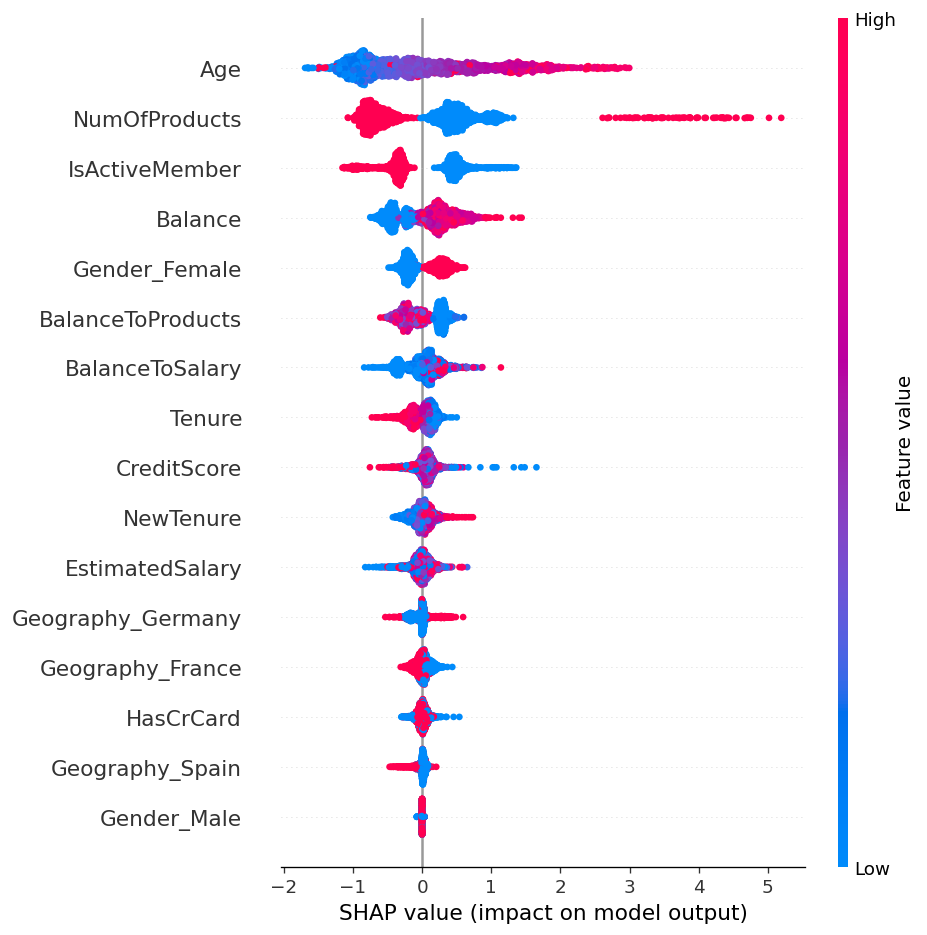

In [ ]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(lgbm_classifier, x_train)

# Calculate SHAP values
shap_values = explainer(x_test)

# Plot SHAP summary plot for the positive class
shap.summary_plot(shap_values, x_test, plot_type="dot", title="SHAP Summary Plot for Positive Class")



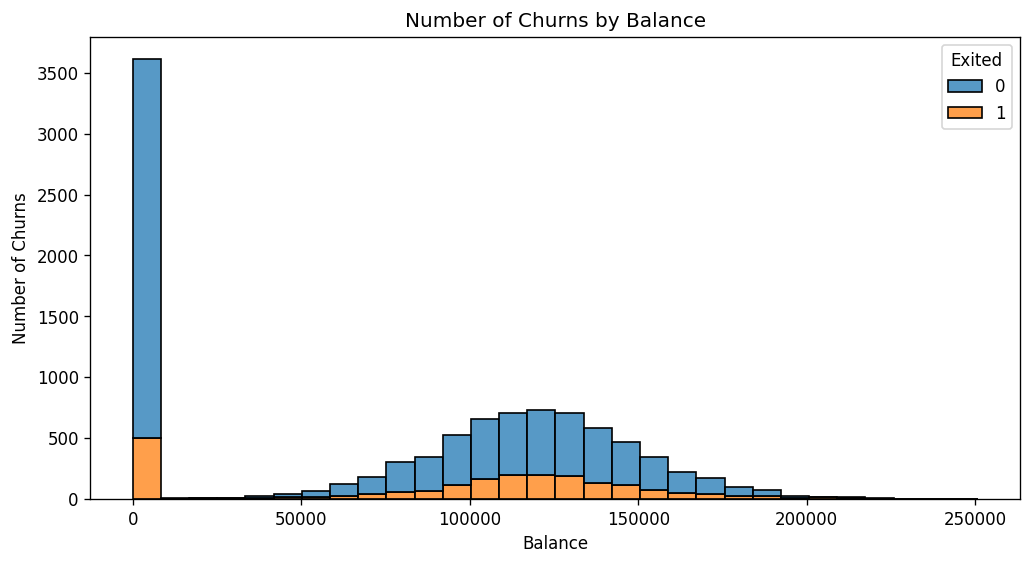

In [ ]:
sns.histplot(data=df, x='Balance', hue='Exited', multiple='stack', bins=30)
plt.xlabel('Balance')
plt.ylabel('Number of Churns')
plt.title('Number of Churns by Balance')
plt.show()

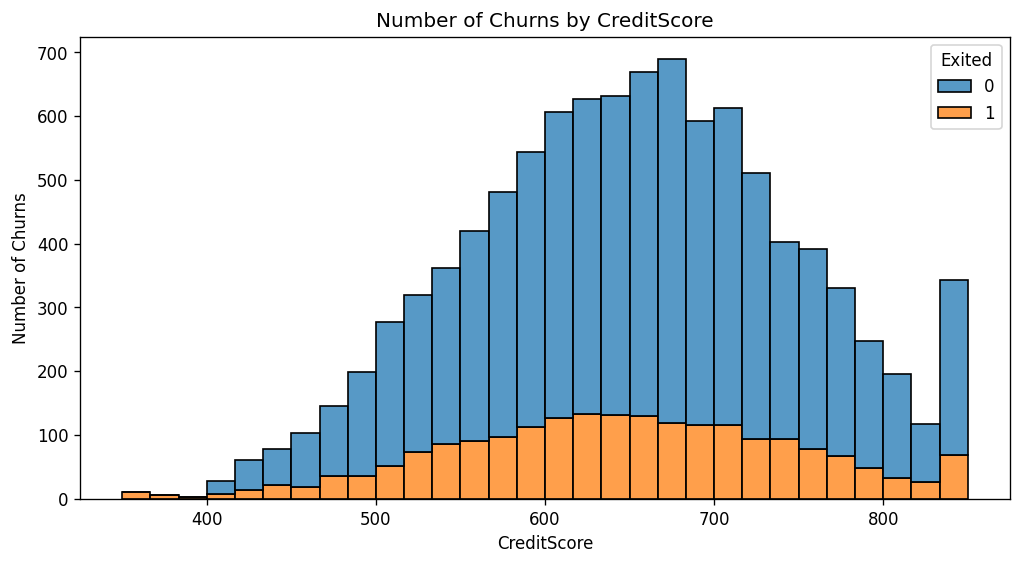

In [ ]:
sns.histplot(data=df, x='CreditScore', hue='Exited', multiple='stack', bins=30)
plt.xlabel('CreditScore')
plt.ylabel('Number of Churns')
plt.title('Number of Churns by CreditScore')
plt.show()

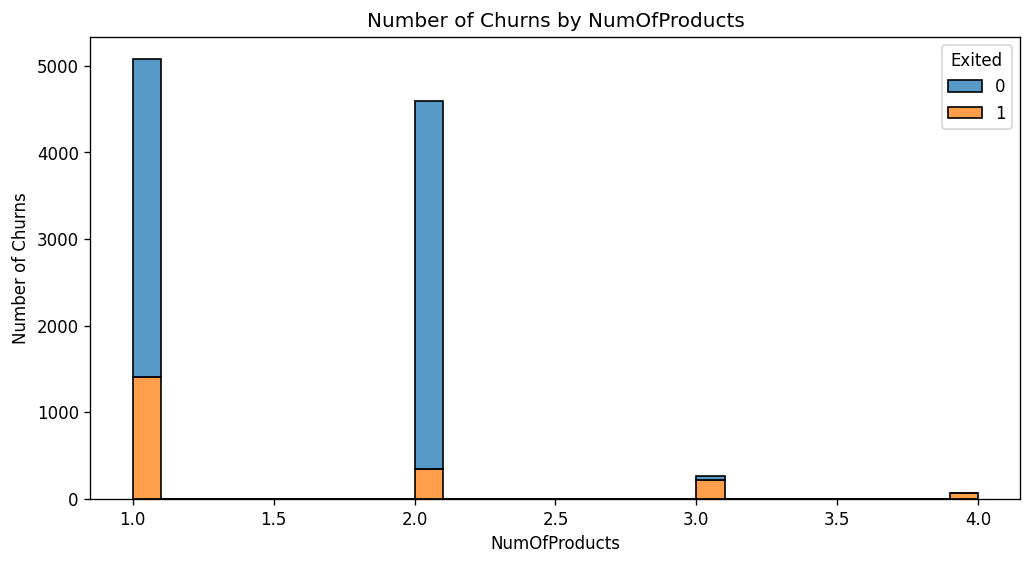

In [ ]:
sns.histplot(data=df, x='NumOfProducts', hue='Exited', multiple='stack', bins=30)
plt.xlabel('NumOfProducts')
plt.ylabel('Number of Churns')
plt.title('Number of Churns by NumOfProducts')
plt.show()

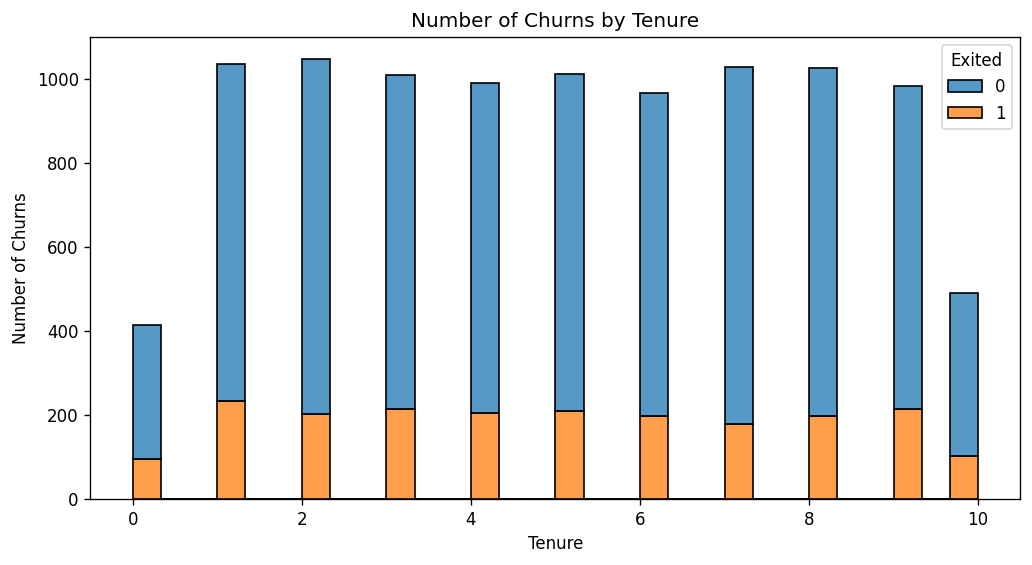

In [ ]:
sns.histplot(data=df, x='Tenure', hue='Exited', multiple='stack', bins=30)
plt.xlabel('Tenure')
plt.ylabel('Number of Churns')
plt.title('Number of Churns by Tenure')
plt.show()

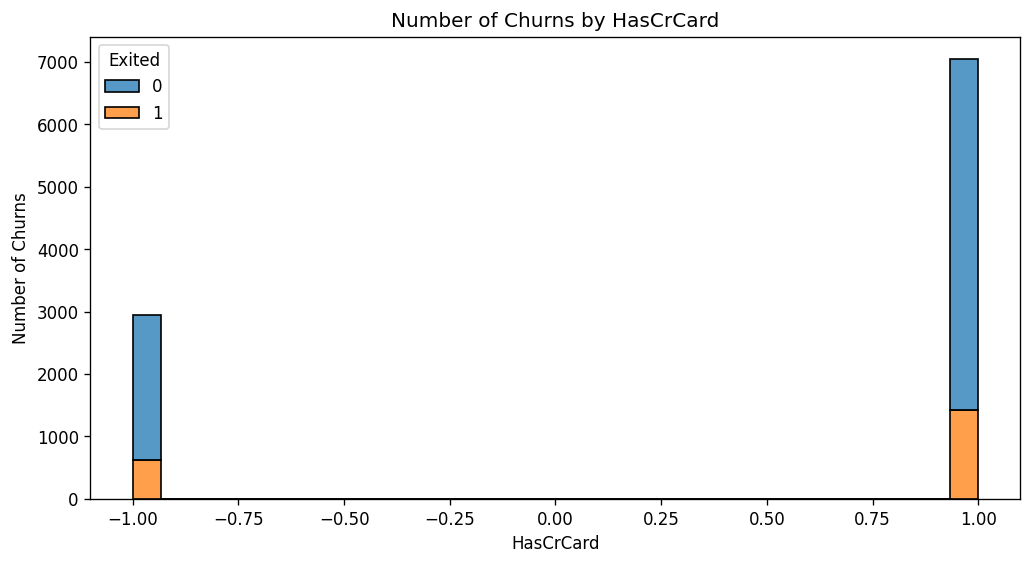

In [ ]:
sns.histplot(data=df, x='HasCrCard', hue='Exited', multiple='stack', bins=30)
plt.xlabel('HasCrCard')
plt.ylabel('Number of Churns')
plt.title('Number of Churns by HasCrCard')
plt.show()

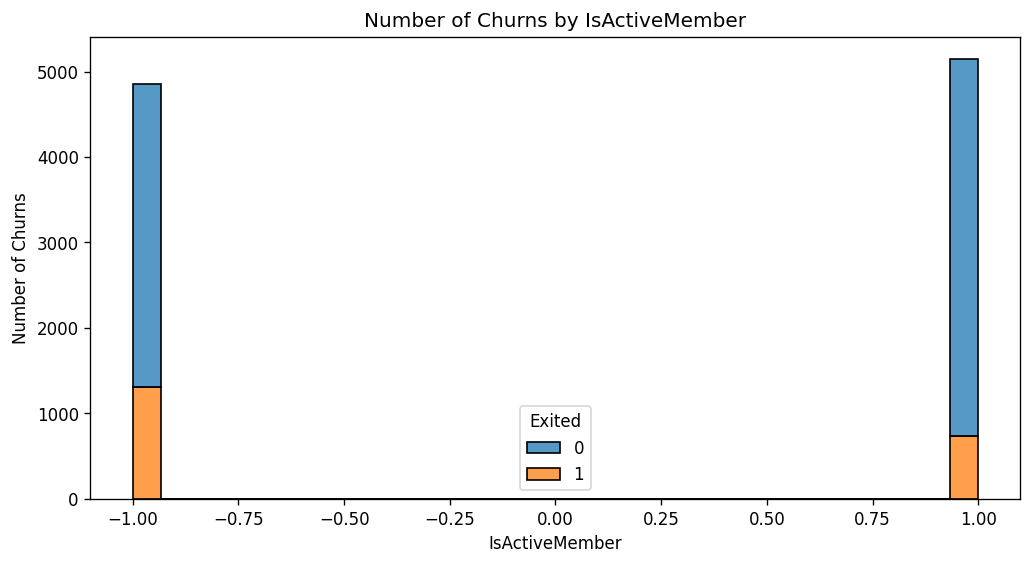

In [ ]:
sns.histplot(data=df, x='IsActiveMember', hue='Exited', multiple='stack', bins=30)
plt.xlabel('IsActiveMember')
plt.ylabel('Number of Churns')
plt.title('Number of Churns by IsActiveMember')
plt.show()

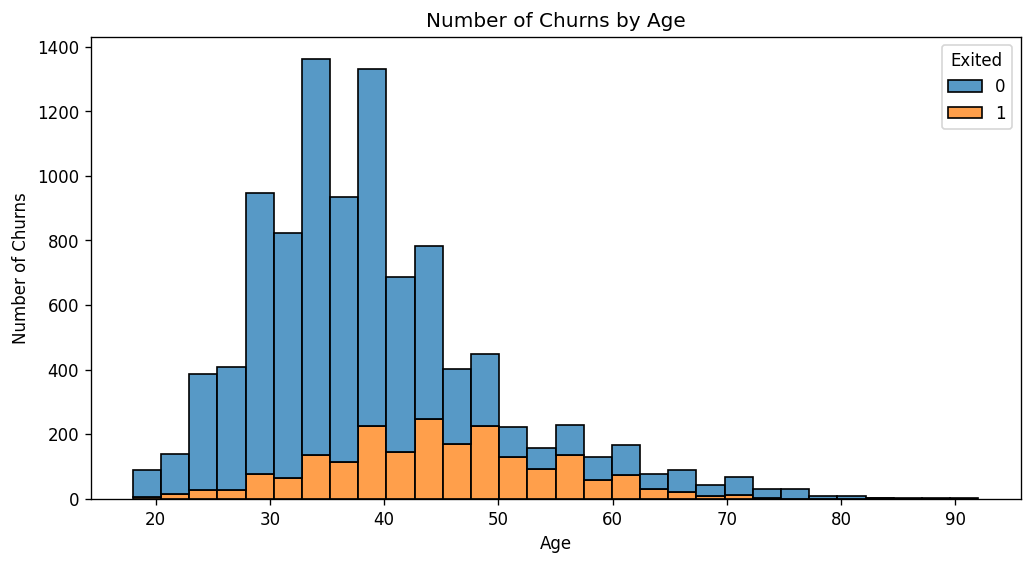

In [ ]:
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=30)
plt.xlabel('Age')
plt.ylabel('Number of Churns')
plt.title('Number of Churns by Age')
plt.show()

In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'BalanceToSalary',
       'NewTenure', 'BalanceToProducts', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

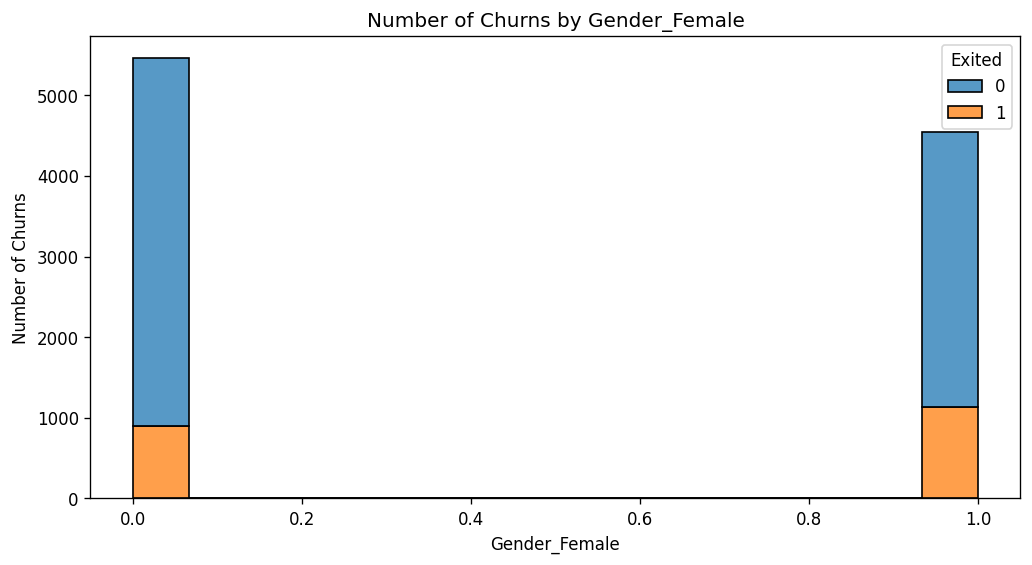

In [ ]:
sns.histplot(data=df, x='Gender_Female', hue='Exited', multiple='stack')
plt.xlabel('Gender_Female')
plt.ylabel('Number of Churns')
plt.title('Number of Churns by Gender_Female')
plt.show()

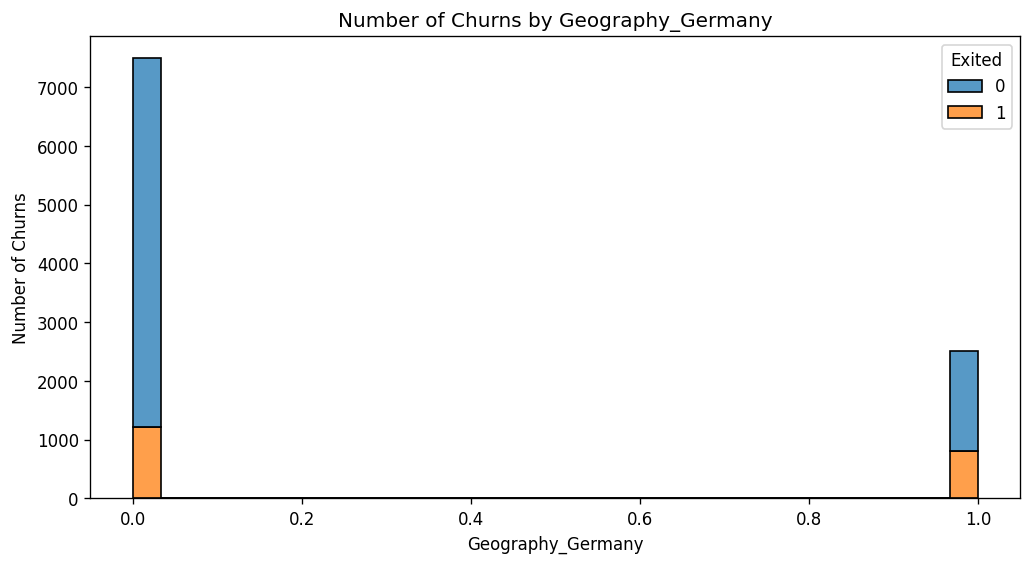

In [ ]:
sns.histplot(data=df, x='Geography_Germany', hue='Exited', multiple='stack', bins=30)
plt.xlabel('Geography_Germany')
plt.ylabel('Number of Churns')
plt.title('Number of Churns by Geography_Germany')
plt.show()